In [1]:
from matriz import solucion_sistema1D_Poisson,solucion_sistema_conductividad_variable, solucion_sistema1D_Neumann
import numpy as np
import matplotlib.pyplot as plt

# Ecuacion de Poisson condicion tipo Dirichlet


$$
            \frac{d^2u(x)}{dx^x}= -f^2u(x)\quad x \epsilon [0,1]
$$


In [2]:
#Parametros iniciales del sistema
#x_inicial= float(input('| Punto inicial del dominio : x_inicial =  '))
#x_final=float(input('| Punto final del dominio      : x_final = '))


#N=int(input('| Número total de incógnitas o nodos    : N = '))
#Ta=float(input('| Temperatura en la frontera A      : A = '))
#Tb=float(input('| Temperatura en la frontera B      : B ='))
#kappa=5
#Q=0
x_inicial=0
x_final=1
N=4
h=(x_final-x_inicial)/(N+1)

Ta=1
Tb=1
f=1
x=[i for i in np.arange(x_inicial,x_final+h,h)]
#x=np.array(x)

In [3]:
u=solucion_sistema1D_Poisson(N,h,Ta,Tb,f)
if len(u)<len(x):
    x[-2]=Tb
    x.pop(-1)


In [4]:
u_analitica= lambda x,f: ((1-np.cos(f))/np.sin(f))*np.sin(f*x)+np.cos(f*x)

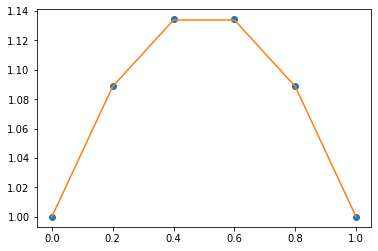

In [5]:
plt.plot(x,u,'o')
plt.plot(x,u_analitica(np.array(x),f))

# Ecuacion de Poisson, conductividad no constante



In [6]:
x_inicial=0
x_final=1
N=50
h=(x_final-x_inicial)/(N+1)
x=np.array([i for i in np.arange(x_inicial,x_final+h,h)])
Ta=2.0
Tb=1.0
Q=0
kappa=np.fabs(np.sin(4*np.pi*x))

In [7]:
u=solucion_sistema_conductividad_variable(N,h,Ta,Tb,kappa,Q)

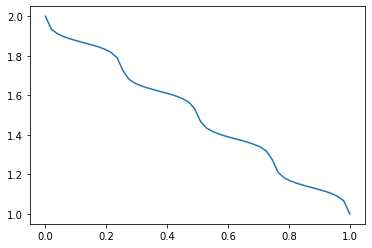

In [8]:
plt.plot(x,u)

In [9]:
kappa=np.random.random(len(x))
u=solucion_sistema_conductividad_variable(N,h,Ta,Tb,kappa,Q)

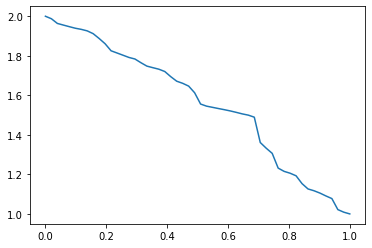

In [10]:
plt.plot(x,u)

# Solucion condicion tipo Neumman

$$
            \frac{d^2u(x)}{dx^x}= -f^2u(x)\quad x \epsilon [0,1]
$$

$$
            \frac{du}{dn}(0)=0\\
            u(1)=3
$$



In [11]:
#Calculos iniciales
x_inicial=0
x_final=1
N=50
h=(x_final-x_inicial)/(N+1)
x=[h*i for i in range(N+2)]
Ta=0
Tb=3
kappa=1
Q=np.exp(x)


In [12]:
u=solucion_sistema1D_Neumann(N,h,kappa,Q,Ta,Tb,"izquierda")

In [13]:
u_analitica= lambda x: np.exp(x)-x-np.exp(1)+4

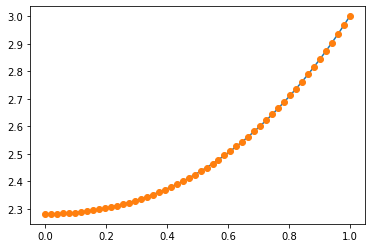

In [14]:
plt.plot(x,u_analitica(x))
plt.plot(x,u,'o')